In [1]:
from matplotlib import pyplot as plt
import xarray as xr
import hvplot.xarray

## Get small NEMO test data set

We'll download the NEMO GYRE dataset published under <http://doi.org/10.5281/zenodo.3634491>.

In [2]:
!mkdir -p NEMO_ORCA05_FOCI_test_data
!curl https://zenodo.org/record/3755721/files/mesh_mask.nc > NEMO_ORCA05_FOCI_test_data/mesh_mask.nc
!curl https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20190101_20191231_grid_T.nc > NEMO_ORCA05_FOCI_test_data/FOCI1.14-TEST.2020.04.1_1m_20190101_20191231_grid_T.nc
!ls -la NEMO_ORCA05_FOCI_test_data

## Load test data

We'll need to mask out land values.

In [3]:
# load mask data
mask_ds = xr.open_dataset("NEMO_ORCA05_FOCI_test_data/mesh_mask.nc").squeeze(drop=True)
display(mask_ds)

<xarray.Dataset>
Dimensions:       (x: 722, y: 511, z: 46)
Dimensions without coordinates: x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    vmask         (z, y, x) int8 ...
    fmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmaskutil     (y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    glamf         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e1f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    ff            (y, x) float64 ...
    mbathy        (y, x) int16 ...
    misf          (y, x) int16 ...
    isfdraft      (y, x) float32 ...
    e3t_0         (z, y, x) float64 ...
    e3u_0         (z, y, x) float64 ...
    e3v_0         (z, y, x) float64 ...
    e3w_0         (z, y, x) float64 ...
    gdept_0       (z, y, x) float32 ...
    gdepu         (z, y, x) float32 ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    gdepw_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...

In [4]:
# load and fix tracer data
tracer_ds = xr.open_dataset(
    "NEMO_ORCA05_FOCI_test_data/FOCI1.14-TEST.2020.04.1_1m_20190101_20191231_grid_T.nc")
tracer_ds = tracer_ds.where(mask_ds.tmaskutil == 1)
tracer_ds = tracer_ds.drop(["nav_lon", "nav_lat"])
tracer_ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 46, time_counter: 12, x: 722, y: 511)
Coordinates:
  * deptht                (deptht) float32 3.0467727 9.454049 ... 5875.141
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2019-01-16T12:00:00 ....
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (deptht, axis_nbounds, y, x) float32 nan nan ... nan
    votemper              (time_counter, deptht, y, x) float32 nan nan ... nan
    time_centered_bounds  (time_counter, axis_nbounds, y, x) datetime64[ns] N...
    time_counter_bounds   (time_counter, axis_nbounds, y, x) datetime64[ns] N...
    vosaline              (time_counter, deptht, y, x) float32 nan nan ... nan
    sosstsst              (time_counter, y, x) float32 nan nan nan ... nan nan
    sosaline              (time_counter, y, x) float32 nan nan nan ... nan nan
    sossheig              (time_counter, y, x) float32 nan nan nan ... nan nan
    sowaflup              (time_counter, y, x) float32 nan nan nan ... nan nan
    soshfldo              (time_counter, y, x) float32 nan nan nan ... nan nan
    sohefldo              (time_counter, y, x) float32 nan nan nan ... nan nan
    somxl010              (time_counter, y, x) float32 nan nan nan ... nan nan
    somixhgt              (time_counter, y, x) float32 nan nan nan ... nan nan
    sowindsp              (time_counter, y, x) float32 nan nan nan ... nan nan
    sohefldp              (time_counter, y, x) float32 nan nan nan ... nan nan
    sowafldp              (time_counter, y, x) float32 nan nan nan ... nan nan
    sobowlin              (time_counter, y, x) float32 nan nan nan ... nan nan
Attributes:
    name:         FOCI1.14-JH024_1m_20190101_20191231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-18 09:38:25 CEST
    history:      Thu Apr 18 10:25:25 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

## Extract data fields

In [14]:
sst = tracer_ds.sosstsst
sss = tracer_ds.vosaline.isel(deptht=0)
ssh = tracer_ds.sossheig

## Have a look

Plot sea-surface temperature, sea-surface salinity, and sea-surface height for the last time step in the dataset.

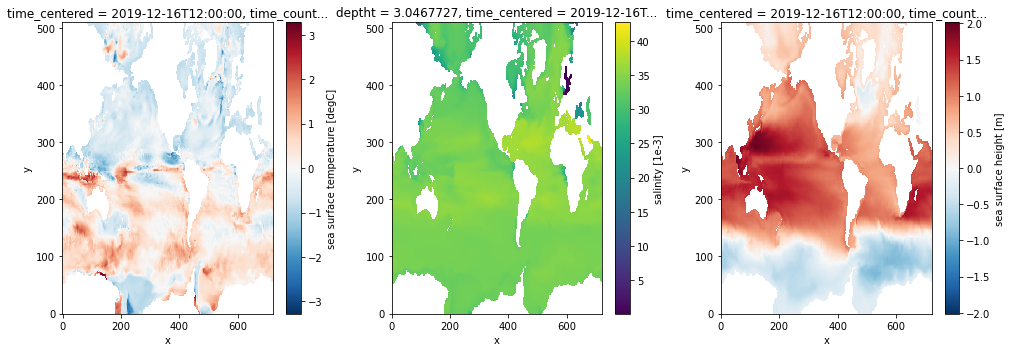

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sst.isel(time_counter=-1).plot(ax=ax[0], x="x", y="y")

sss.isel(time_counter=-1).plot(ax=ax[1], x="x", y="y")

ssh.isel(time_counter=-1).plot(ax=ax[2], x="x", y="y")

fig.tight_layout();

## Compress and decompress data

In [8]:
from ctypes import cdll
cdll.LoadLibrary('/home/jovyan/pysz/lib/libSZ.so')
cdll.LoadLibrary('/home/jovyan/pysz/lib/libzstd.so')

import pysz
import sys

import numpy as np

In [9]:
def compress_decompress_data_array(da, pwre=1e-7):
    # Code from https://github.com/szcompressor/SZ/blob/master/example/test.py
    compressor = pysz.Compressor((pysz.ConfigBuilder().errorBoundMode(pysz.PW_REL)
                                      .pw_relBoundRatio(pwre).build()))
    
    zexact = da.data
    zcomp = compressor.Compress(zexact)
    z_szw = compressor.Decompress(zcomp, zexact.shape, da.dtype)
    
    da_reconstructed = xr.zeros_like(da)
    da_reconstructed.data = z_szw

    ratio_szw = zexact.nbytes / sys.getsizeof(zcomp)
    pwre_szw = np.max(np.abs(zexact - z_szw) / np.abs(zexact))
    
    print(f'Compression ratio for SZ wrapper: {ratio_szw:.2}')
    print(f'Pointwise relative error for SZ wrapper: {pwre_szw:.2e}')

    return da_reconstructed

In [22]:
# sst_rec = compress_decompress_data_array(sst.where(~sst.isnull(), other=-100), pwre=1e-2).where(~sst.isnull())
sst_rec = compress_decompress_data_array(sst, pwre=1e-2)

Compression ratio for SZ wrapper: 6.4
Pointwise relative error for SZ wrapper: nan


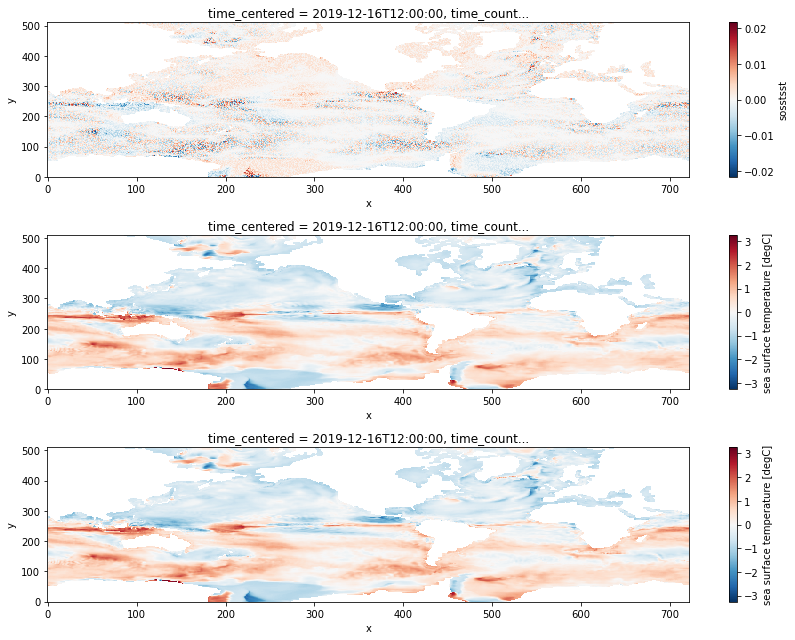

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9))

(sst_rec - sst).isel(time_counter=-1).plot(ax=ax[0], x="x", y="y")
sst.isel(time_counter=-1).plot(ax=ax[1], x="x", y="y")
sst_rec.isel(time_counter=-1).plot(ax=ax[2], x="x", y="y")

fig.tight_layout();

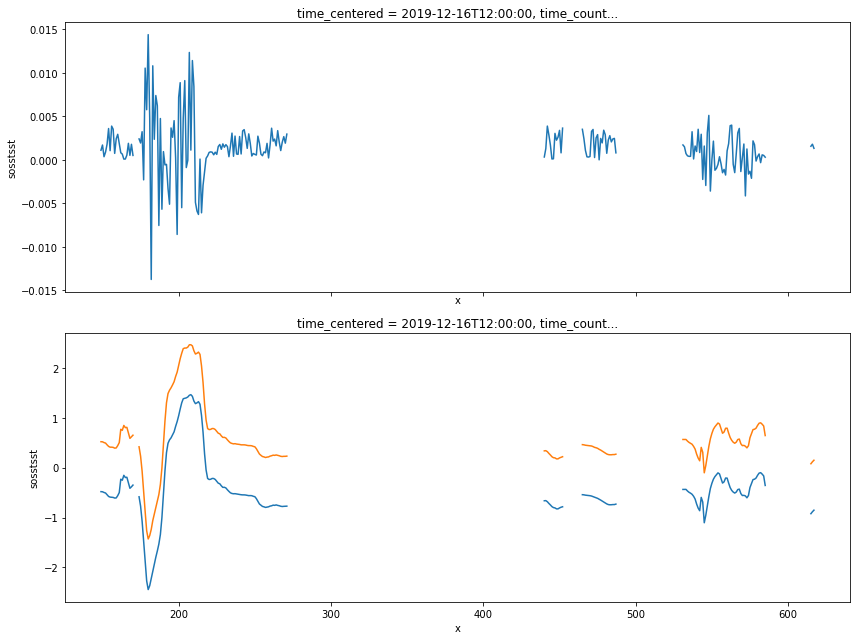

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

(sst_rec - sst).isel(time_counter=11, y=450).plot(ax=ax[0])
sst.isel(time_counter=11, y=450).plot(ax=ax[1])
(1 + sst_rec).where(~sst.isnull()).isel(time_counter=11, y=450).plot(ax=ax[1])

fig.tight_layout();